In [312]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [313]:
ArtInfo = pd.read_csv ('Christies_Art_Objects_Clean.csv')

In [314]:
ArtInfo.sort_values('price', ascending=False).head(50)

,Artist,Birth,Death,Age,Alive?,popularity,Art Title,DoC,Currency,price,low_estimate,high_estimate,Sold,Est Accuracy,Dimentions,close date,Auction Title
606,jackson pollock,1912,1956,44,0,"112,000","Number 19, 1948",1948,USD,58363750.0,25000000.0,35000000.0,1,1,(78.4 x 57.4 cm.),2013,POST-WAR & CONTEMPORARY EVENING SALE
1738,lucian freud,1922,2011,89,0,"351,000",Benefits Supervisor Resting,1994,USD,56165000.0,30000000.0,50000000.0,1,1,(150.5 x 161.2 cm.),2015,POST-WAR AND CONTEMPORARY ART EVENING SALE
761,cy twombly,1928,2011,83,0,"53,100",Untitled,1969,USD,42725000.0,35000000.0,55000000.0,1,0,(200.7 x 239.4 cm.),2015,POST-WAR AND CONTEMPORARY ART EVENING SALE
494,franz kline,1910,1962,52,0,"255,000",Untitled,1957,USD,40402500.0,20000000.0,30000000.0,1,1,(200.7 x 280.4 cm.),2012,POST-WAR & CONTEMPORARY ART EVENING SALE
2447,roy lichtenstein,1923,1997,74,0,0,Seductive Girl,1996,USD,31525000.0,22000000.0,28000000.0,1,1,(127 x 182.8 cm.),2013,POST-WAR AND CONTEMPORARY EVENING SALE
1639,richard diebenkorn,1922,1993,71,0,"66,300",Ocean Park #126,1984,USD,23937500.0,16000000.0,20000000.0,1,1,(236.2 x 205.7 cm.),2018,POST-WAR AND CONTEMPORARY ART EVENING SALE
2486,roy lichtenstein,1923,1997,74,0,0,Nude with Yellow Flower,1994,USD,23643750.0,12000000.0,16000000.0,1,1,(233 x 183 cm.),2013,POST-WAR & CONTEMPORARY EVENING SALE
584,joan miró,1893,1983,90,0,"999,000",Peinture,0,USD,23375000.0,18000000.0,25000000.0,1,0,(129.8 x 161.9 cm.),2017,IMPRESSIONIST & MODERN ART EVENING SALE INCLUD...
0,pierre bonnard,1867,1947,80,0,"114,000",La Terrasse ou Une terrasse à Grasse,0,USD,19570000.0,5000000.0,8000000.0,1,1,(125.3 x 134.4 cm.),2019,IMPRESSIONIST AND MODERN ART EVENING SALE
467,lucian freud,1922,2011,89,0,"351,000",Girl with Closed Eyes,1986,USD,18968125.0,12500000.0,18750000.0,1,1,(46.3 x 60.4cm.),2022,20TH/21ST CENTURY: LONDON EVENING SALE


# Analisis of Auction House Estimates

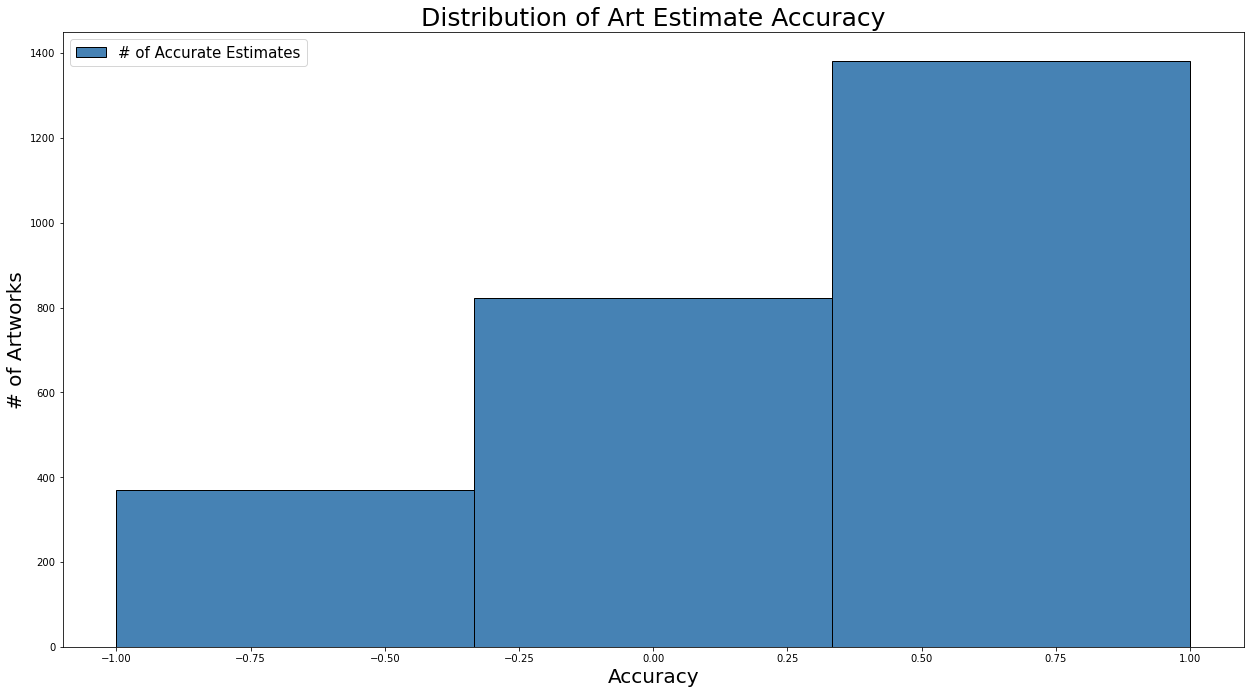

In [315]:
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
fig.tight_layout(pad=6.0)

ax.hist(ArtInfo["Est Accuracy"],bins = 3, label = '# of Accurate Estimates',
        histtype='bar', ec='black', color = "steelblue")
ax.set_title("Distribution of Art Estimate Accuracy" , fontsize = 25)
ax.set_xlabel("Accuracy", fontsize = 20)
ax.set_ylabel("# of Artworks", fontsize = 20)
ax.legend(loc = "upper left", prop={"size": 15})

plt.show(fig)

In [316]:
above = 0
bellow = 0
on = 0
for items in ArtInfo["Est Accuracy"]:
    if items == 0:
        on += 1
    elif items == 1:
        above += 1
    else:
        bellow += 1

total = above + on + bellow
        
Accuracy = on / total
per_over = above/ total
per_under = bellow/ total

print("Auction House records have an accuracy of:", round(Accuracy,2), "%")
print("percentage Over Estimated:", round(per_over,2), "%")
print("percentage under estimated:", round(per_under,2), "%")

    

Auction House records have an accuracy of: 0.32 %
percentage Over Estimated: 0.54 %
percentage under estimated: 0.14 %


# Pi Chart

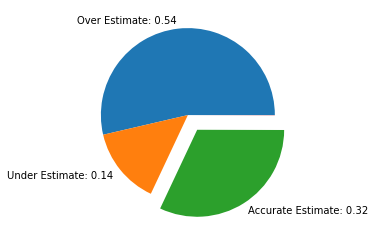

In [317]:
import matplotlib.pyplot as plt
import numpy as np

y = np.array([above, bellow, on, 1])
mylabels = ["Over Estimate: " + str(round(per_over,2)), 
            "Under Estimate: " + str(round(per_under,2)), 
            "Accurate Estimate: " + str(round(Accuracy,2)), ""]
myexplode = [0, 0, 0.2, 0]

plt.pie(y, labels = mylabels, explode = myexplode)
plt.show() 

# Looking At Corrilations

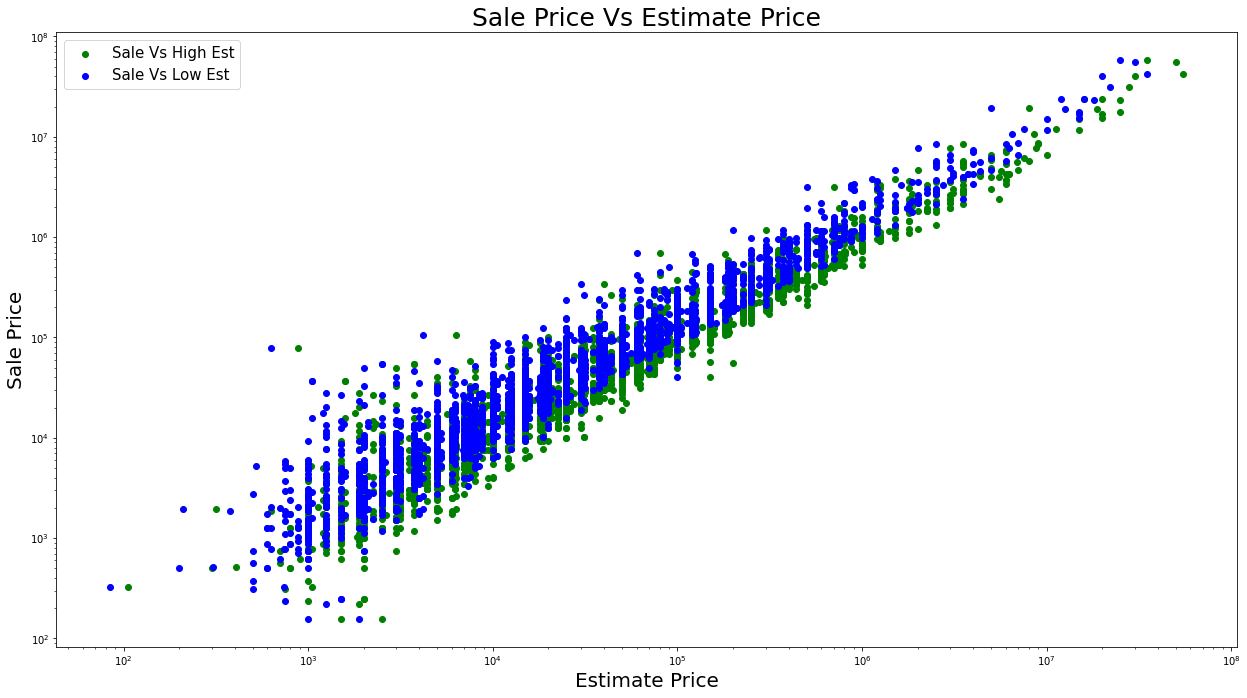

In [318]:
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
fig.tight_layout(pad=6.0)

ax.scatter(ArtInfo["high_estimate"], ArtInfo["price"], color = "green", label = 'Sale Vs High Est')
plt.yscale("log")
plt.xscale("log")

ax.scatter(ArtInfo["low_estimate"],ArtInfo["price"], color = "blue", label = 'Sale Vs Low Est')
plt.yscale("log")
plt.xscale("log")

ax.set_title("Sale Price Vs Estimate Price" , fontsize = 25)
ax.set_xlabel("Estimate Price", fontsize = 20)
ax.set_ylabel("Sale Price", fontsize = 20)
ax.legend(loc = "upper left", prop={"size": 15})

In [319]:
Removed_duplicate_Artists = ArtInfo.copy()
Removed_duplicate_Artists.drop_duplicates(subset ="Artist",keep = "first", inplace = True)

In [320]:
Removed_duplicate_Artists.head()

,Artist,Birth,Death,Age,Alive?,popularity,Art Title,DoC,Currency,price,low_estimate,high_estimate,Sold,Est Accuracy,Dimentions,close date,Auction Title
0,pierre bonnard,1867,1947,80,0,"114,000",La Terrasse ou Une terrasse à Grasse,0,USD,19570000.0,5000000.0,8000000.0,1,1,(125.3 x 134.4 cm.),2019,IMPRESSIONIST AND MODERN ART EVENING SALE
1,antonio saura,1930,1998,68,0,"212,000",Crucifixión,1961,USD,273125.0,250000.0,375000.0,1,0,(190.2 x 237.5cm.),2014,POST-WAR & CONTEMPORARY ART EVENING AUCTION
2,pablo picasso,1881,1973,92,0,"475,000",Guitare pendue au mur,1927,USD,1215000.0,1000000.0,2000000.0,1,0,(27.1 x 35.2 cm.),2019,IMPRESSIONIST AND MODERN ART EVENING SALE
3,yves saint laurent,1936,2008,72,0,"549,000",Ondine. Acte II,0,USD,7812.5,2500.0,3750.0,1,1,(32.7 x 25cm.),2021,First Open: Post-War & Contemporary Art Online
4,yayoi kusama,1929,0,93,1,"106,000",Butterflies,1998,USD,112500.0,70000.0,90000.0,1,1,(55.8 x 38.1 x 30.4 cm.),2014,POST-WAR & CONTEMPORARY ART AFTERNOON SESSION


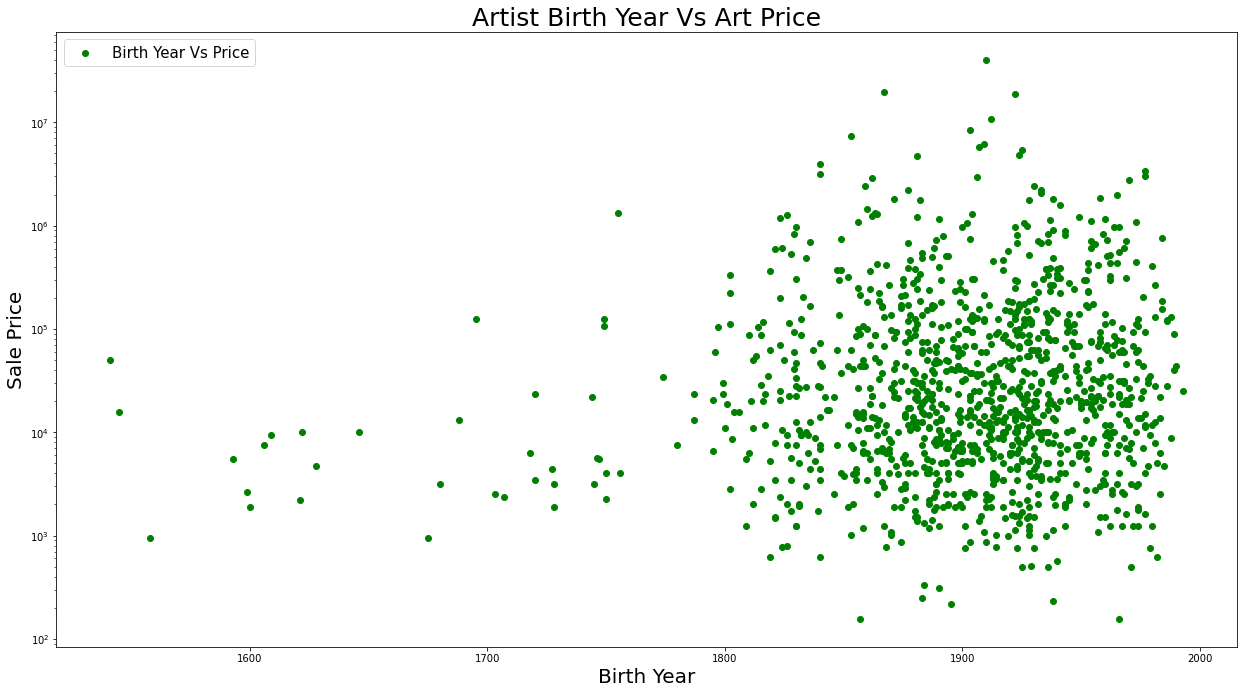

In [321]:
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
fig.tight_layout(pad=6.0)

ax.scatter(Removed_duplicate_Artists["Birth"],Removed_duplicate_Artists["price"], color = "green", 
           label = 'Birth Year Vs Price')
plt.yscale("log")

ax.set_title("Artist Birth Year Vs Art Price" , fontsize = 25)
ax.set_xlabel("Birth Year", fontsize = 20)
ax.set_ylabel("Sale Price", fontsize = 20)
ax.legend(loc = "upper left", prop={"size": 15})


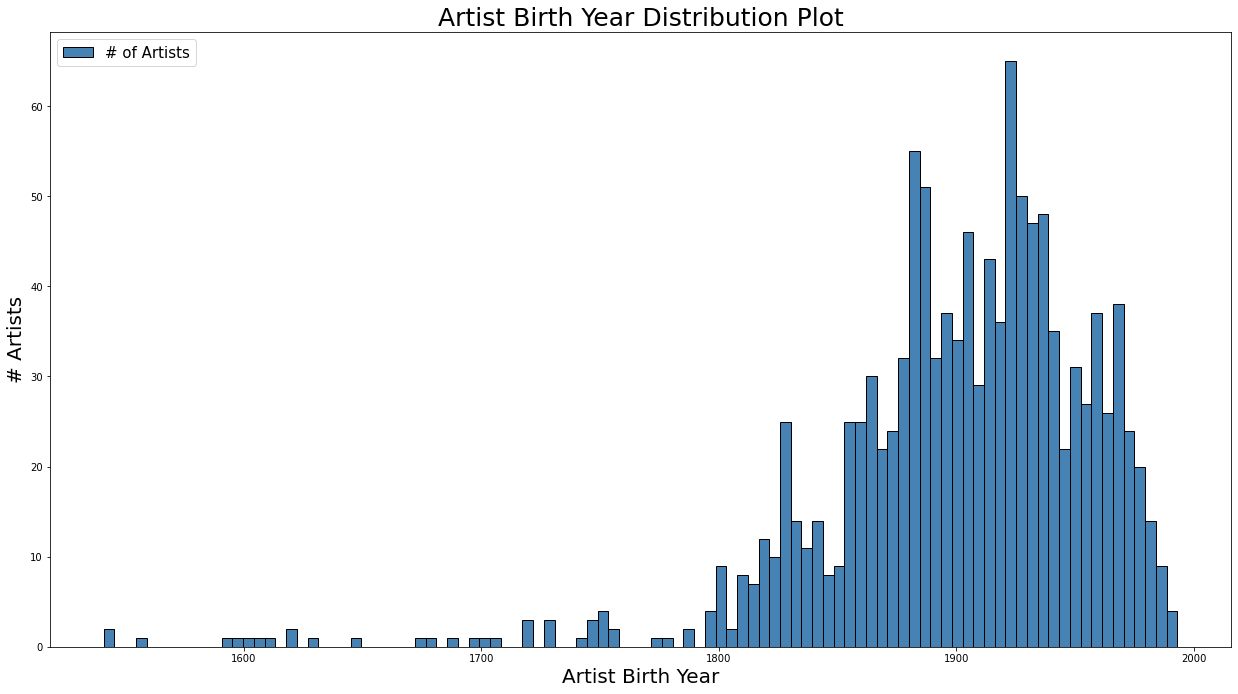

In [322]:
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
fig.tight_layout(pad=6.0)

ax.hist(Removed_duplicate_Artists["Birth"],bins = 100, label = '# of Artists',
        histtype='bar', ec='black', color = "steelblue")
ax.set_title("Artist Birth Year Distribution Plot" , fontsize = 25)
ax.set_xlabel("Artist Birth Year", fontsize = 20)
ax.set_ylabel("# Artists", fontsize = 20)
ax.legend(loc = "upper left", prop={"size": 15})

plt.show(fig)

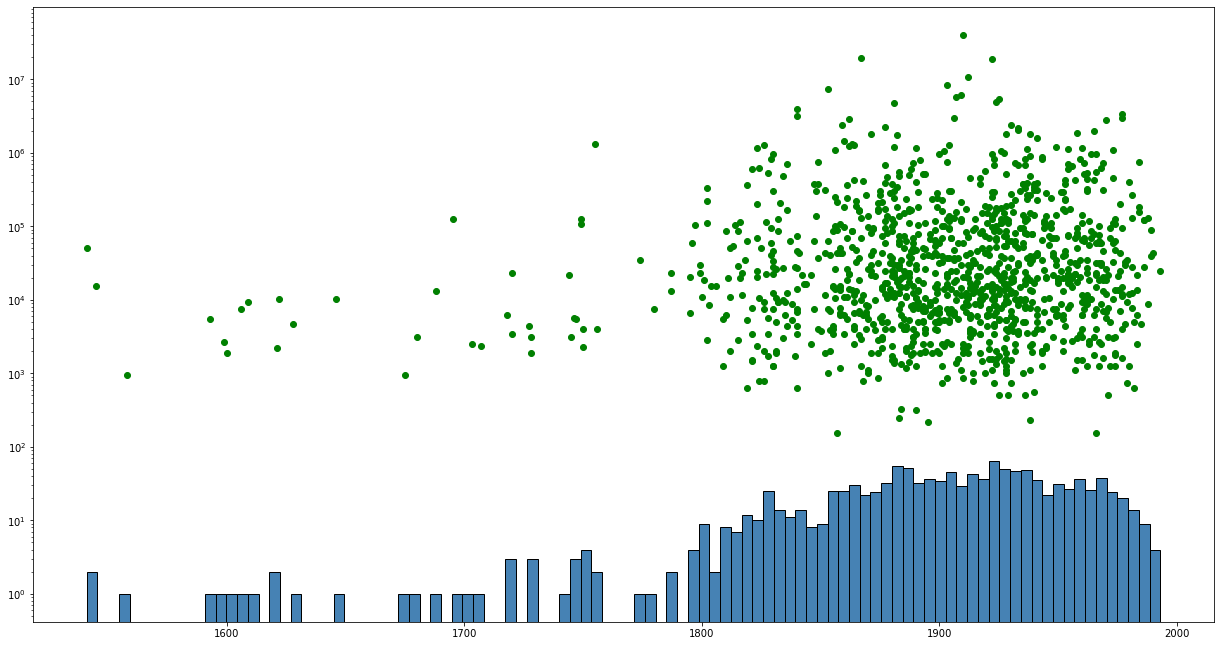

In [323]:
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
fig.tight_layout(pad=6.0)

ax.hist(Removed_duplicate_Artists["Birth"],bins = 100, label = '# of Artists',
        histtype='bar', ec='black', color = "steelblue")

ax.scatter(Removed_duplicate_Artists["Birth"],Removed_duplicate_Artists["price"], color = "green", 
           label = 'Birth Year Vs Price')
plt.yscale("log")

In [324]:
pop = []
Popularity_df = ArtInfo.copy()
Popularity_df.drop(Popularity_df.index[Popularity_df['popularity'] == "0"], inplace=True)
Popularity_df.head(2000)

for items in Popularity_df['popularity']:
    popularity = items.replace(",", "")
    try:
        popularity_int = int(popularity)
    except:
        popularity_int = 0
    
    pop.append(popularity_int)

Popularity_df['popularity'] = pop

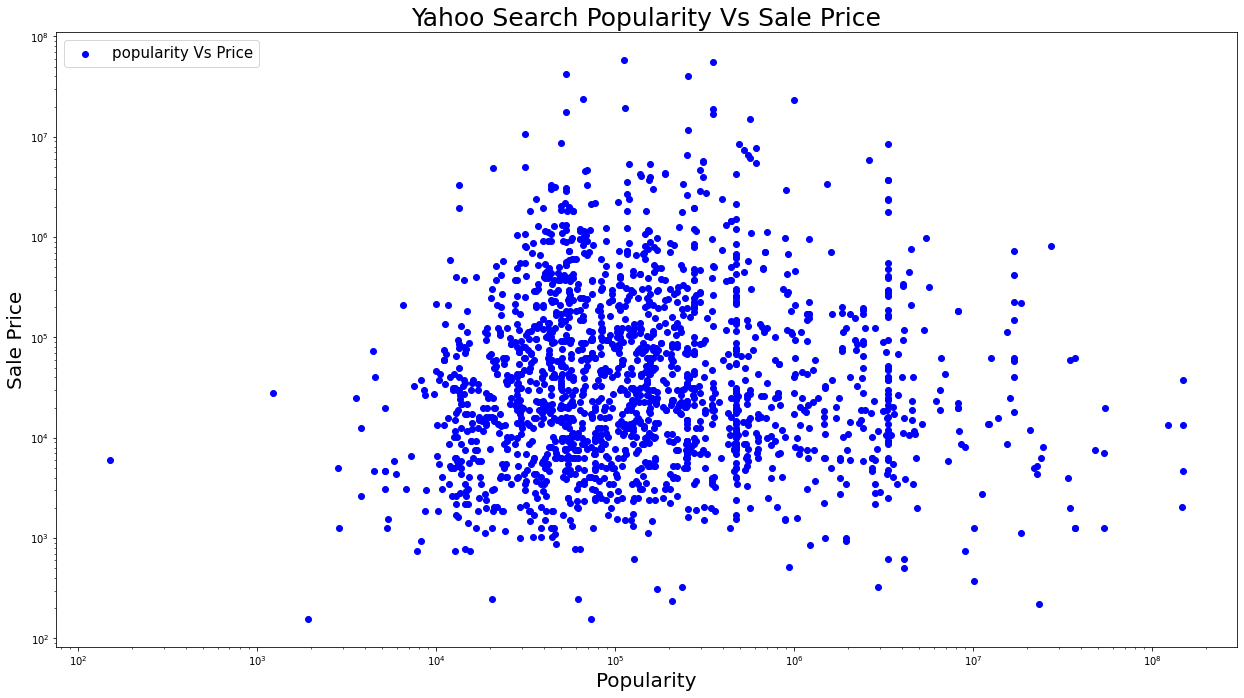

In [325]:
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
fig.tight_layout(pad=6.0)

ax.scatter(Popularity_df['popularity'],Popularity_df["price"], color = "blue", label = 'popularity Vs Price')
plt.yscale("log")
plt.xscale("log")

ax.set_title("Yahoo Search Popularity Vs Sale Price" , fontsize = 25)
ax.set_xlabel("Popularity", fontsize = 20)
ax.set_ylabel("Sale Price", fontsize = 20)
ax.legend(loc = "upper left", prop={"size": 15})

# Corilation Matrix

In [326]:
Popularity_df.head()

,Artist,Birth,Death,Age,Alive?,popularity,Art Title,DoC,Currency,price,low_estimate,high_estimate,Sold,Est Accuracy,Dimentions,close date,Auction Title
0,pierre bonnard,1867,1947,80,0,114000,La Terrasse ou Une terrasse à Grasse,0,USD,19570000.0,5000000.0,8000000.0,1,1,(125.3 x 134.4 cm.),2019,IMPRESSIONIST AND MODERN ART EVENING SALE
1,antonio saura,1930,1998,68,0,212000,Crucifixión,1961,USD,273125.0,250000.0,375000.0,1,0,(190.2 x 237.5cm.),2014,POST-WAR & CONTEMPORARY ART EVENING AUCTION
2,pablo picasso,1881,1973,92,0,475000,Guitare pendue au mur,1927,USD,1215000.0,1000000.0,2000000.0,1,0,(27.1 x 35.2 cm.),2019,IMPRESSIONIST AND MODERN ART EVENING SALE
3,yves saint laurent,1936,2008,72,0,549000,Ondine. Acte II,0,USD,7812.5,2500.0,3750.0,1,1,(32.7 x 25cm.),2021,First Open: Post-War & Contemporary Art Online
4,yayoi kusama,1929,0,93,1,106000,Butterflies,1998,USD,112500.0,70000.0,90000.0,1,1,(55.8 x 38.1 x 30.4 cm.),2014,POST-WAR & CONTEMPORARY ART AFTERNOON SESSION


In [327]:
Popularity_df.drop("Artist", axis=1, inplace=True)
Popularity_df.drop("Art Title", axis=1, inplace=True)
Popularity_df.drop("Currency", axis=1, inplace=True)
Popularity_df.drop("Dimentions", axis=1, inplace=True)
Popularity_df.drop("Auction Title", axis=1, inplace=True)

In [328]:
Popularity_df.head()

,Birth,Death,Age,Alive?,popularity,DoC,price,low_estimate,high_estimate,Sold,Est Accuracy,close date
0,1867,1947,80,0,114000,0,19570000.0,5000000.0,8000000.0,1,1,2019
1,1930,1998,68,0,212000,1961,273125.0,250000.0,375000.0,1,0,2014
2,1881,1973,92,0,475000,1927,1215000.0,1000000.0,2000000.0,1,0,2019
3,1936,2008,72,0,549000,0,7812.5,2500.0,3750.0,1,1,2021
4,1929,0,93,1,106000,1998,112500.0,70000.0,90000.0,1,1,2014


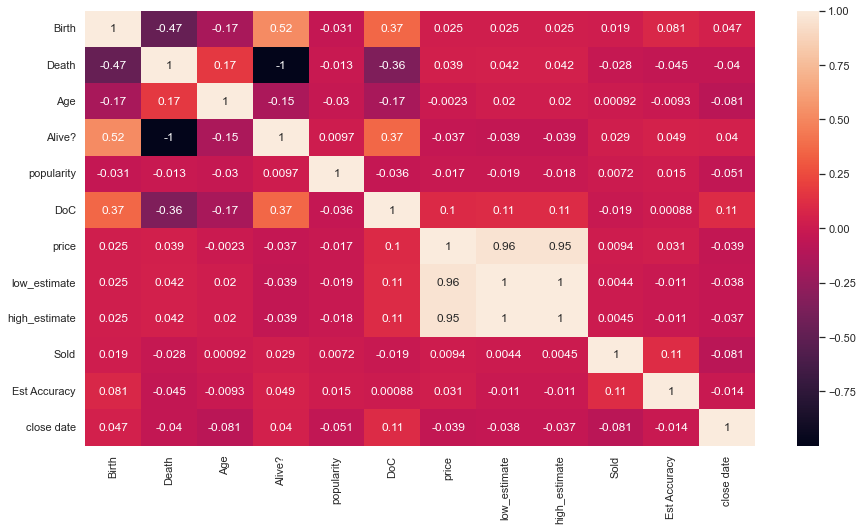

In [338]:
corrMatrix = Popularity_df.corr()
sn.set(rc = {'figure.figsize':(15,8)})
sn.heatmap(corrMatrix, annot=True)
plt.show()


# Sales per year

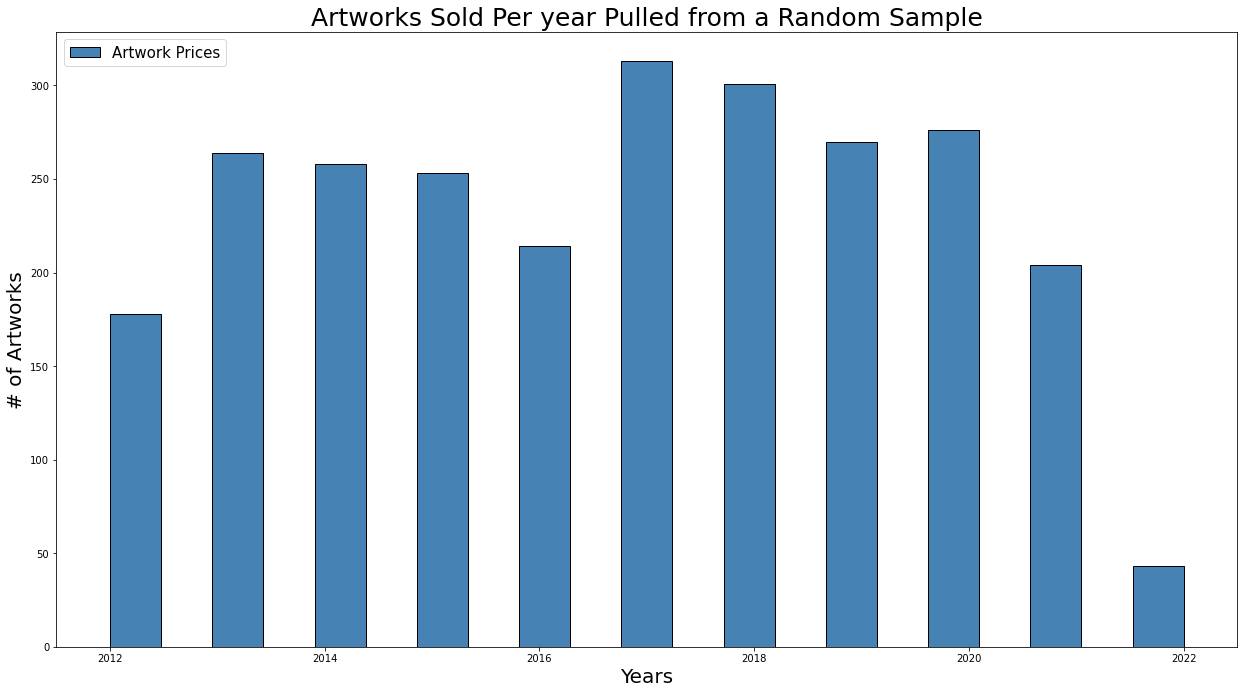

In [330]:
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
fig.tight_layout(pad=6.0)

ax.hist(ArtInfo["close date"],bins = 21, label = 'Artwork Prices',
        histtype='bar', ec='black', color = "steelblue")
ax.set_title("Artworks Sold Per year Pulled from a Random Sample" , fontsize = 25)
ax.set_xlabel("Years", fontsize = 20)
ax.set_ylabel("# of Artworks", fontsize = 20)
ax.legend(loc = "upper left", prop={"size": 15})

plt.show(fig)

In [331]:
Artist_Count = ArtInfo['Artist'].value_counts(ascending=True)

In [332]:
Artist_Count_Dict = Artist_Count.to_dict()


In [333]:
smallest = Artist_Count.nsmallest(10).to_dict()

In [334]:
largest = Artist_Count.nlargest(10).to_dict()
names = list(largest.keys())
values = list(largest.values())



<BarContainer object of 10 artists>

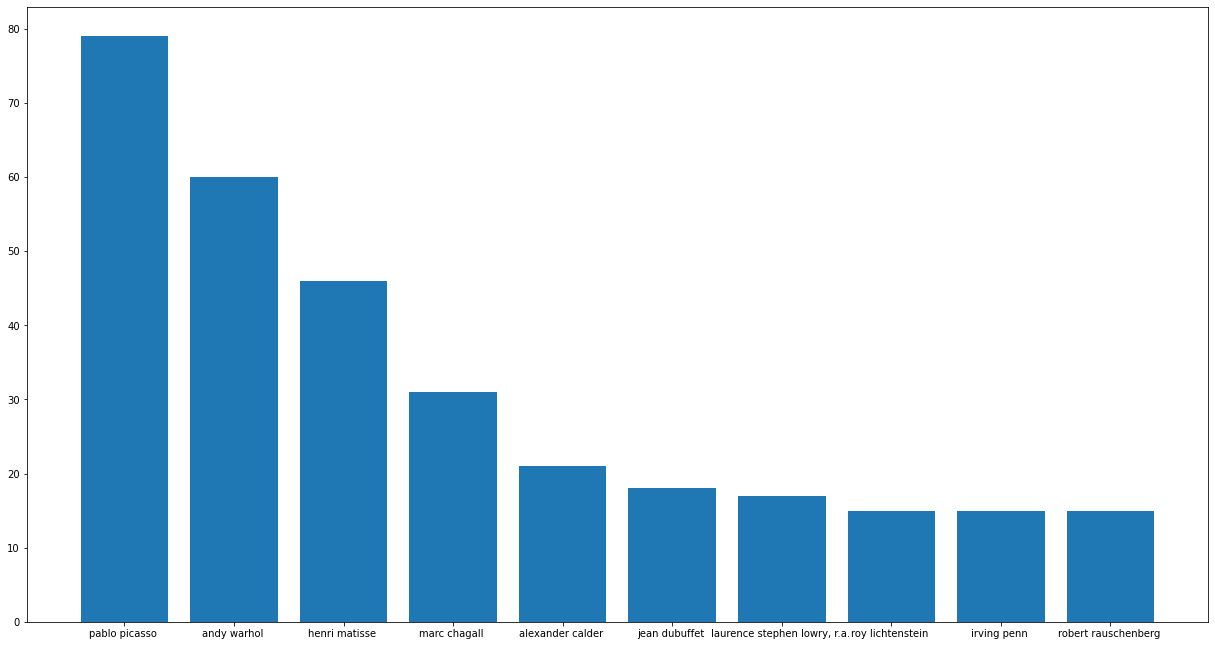

In [335]:
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
fig.tight_layout(pad=6.0)

ax.bar(names, values)
